<a href="https://colab.research.google.com/github/pawan-cpu/STTP-Intel-Edge/blob/main/Pawank_Sttp_Intel_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [26]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import tempfile
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [27]:
! pip install -q tensorflow-model-optimization

# Helper Functions

In [28]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [29]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [30]:
fashion_mnist = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [32]:
test_images.shape

(10000, 32, 32, 3)

In [33]:
len(train_labels)

50000

In [34]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Test Dataset

In [35]:
test_images.shape

(10000, 32, 32, 3)

In [36]:
len(test_labels)

10000

## Preprocessing

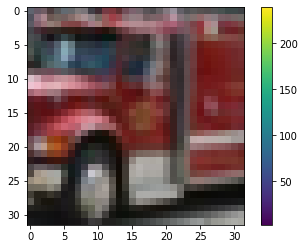

In [37]:
plt.figure()
plt.imshow(train_images[88])
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build & Compile the model


In [39]:
model = keras.Sequential([
    Flatten(input_shape=(32, 32,3)),
    Dense(128, activation='relu'),
    Dense(256,activation='relu'),
    Dense(10)
])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               393344    
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 428,938
Trainable params: 428,938
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='SGD',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9103 - accuracy: 0.3141 - val_loss: 1.7904 - val_accuracy: 0.3539
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7232 - accuracy: 0.3859 - val_loss: 1.6675 - val_accuracy: 0.4091
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6390 - accuracy: 0.4172 - val_loss: 1.6692 - val_accuracy: 0.4001
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5826 - accuracy: 0.4402 - val_loss: 1.5928 - val_accuracy: 0.4331
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5393 - accuracy: 0.4567 - val_loss: 1.6399 - val_accuracy: 0.4277
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5036 - accuracy: 0.4681 - val_loss: 1.5442 - val_accuracy: 0.4554
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4737 - accuracy: 0.4788 - val_loss: 1.4741 - val_accuracy:

## CNN MODEL

In [43]:
IMG_ROWS = 32
IMG_COLS = 32
# Model
model = keras.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 2048)             

In [45]:
BATCH_SIZE = 16
NO_EPOCHS = 10
train_model = model.fit(train_images, train_labels,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(test_images,test_labels))

Epoch 1/10
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4004 - accuracy: 0.4949 - val_loss: 1.1504 - val_accuracy: 0.5890
Epoch 2/10
3125/3125 [==============================] - 11s 4ms/step - loss: 1.0039 - accuracy: 0.6462 - val_loss: 1.0026 - val_accuracy: 0.6452
Epoch 3/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.8491 - accuracy: 0.7001 - val_loss: 0.9325 - val_accuracy: 0.6799
Epoch 4/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.7409 - accuracy: 0.7389 - val_loss: 0.8656 - val_accuracy: 0.7016
Epoch 5/10
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6497 - accuracy: 0.7688 - val_loss: 0.8762 - val_accuracy: 0.7054
Epoch 6/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.5692 - accuracy: 0.8001 - val_loss: 0.9591 - val_accuracy: 0.6925
Epoch 7/10
3125/3125 [==============================] - 11s 4ms/step - loss: 0.4939 - accuracy: 0.8255 - val_loss: 0.9413 - val_ac

In [46]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model)

## ADDING DROPOUT and Reducing OVERFITTING

In [47]:
# Model
model = keras.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


In [48]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

In [49]:
BATCH_SIZE = 16
NO_EPOCHS = 10
train_model = model.fit(train_images, train_labels,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(test_images,test_labels))

Epoch 1/10


ValueError: ignored

In [ ]:
plot_accuracy_and_loss(train_model)


In [ ]:
KERAS_MODEL_NAME = "tf_model_fashion_mnist.h5"

In [ ]:
model.save(KERAS_MODEL_NAME)

In [ ]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

In [ ]:
keras_model_size = get_file_size(KERAS_MODEL_NAME)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy is {}%'.format(round(100*test_acc, 2)))

##MODEL PRUNING

You will apply pruning to the whole model and see this in the model summary.

In this example, you start the model with 50% sparsity (50% zeros in weights)
and end with 80% sparsity.


In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = train_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]
  
model_for_pruning.fit(train_images, train_labels,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

In [ ]:
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
   test_images, test_labels, verbose=0)

print('Pruned test accuracy:', model_for_pruning_accuracy)

Both `tfmot.sparsity.keras.strip_pruning` and applying a standard compression algorithm (e.g. via gzip) are necessary to see the compression
benefits of pruning.

*   `strip_pruning` is necessary since it removes every tf.Variable that pruning only needs during training, which would otherwise add to model size during inference
*   Applying a standard compression algorithm is necessary since the serialized weight matrices are the same size as they were before pruning. However, pruning makes most of the weights zeros, which is
added redundancy that algorithms can utilize to further compress the model.

First, create a compressible model for TensorFlow.

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

In [ ]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on ever y image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32).reshape(-1,28,28,1)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

In [ ]:
interpreter = tf.lite.Interpreter(model_content=quantized_and_pruned_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Pruned and quantized TFLite test_accuracy:', test_accuracy)
print('Pruned TF test accuracy:', model_for_pruning_accuracy)

# TF Lite Model

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

In [ ]:
tflite_file_size = get_file_size(TF_LITE_MODEL_FILE_NAME)

# Check Input Tensor Shape

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

# Resize Tensor Shape

In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28,1))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

In [ ]:
test_images.dtype

In [ ]:
test_imgs_numpy = np.array(test_images, dtype=np.float32).reshape(-1,28,28,1)

In [ ]:
test_imgs_numpy.dtype

In [ ]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

In [ ]:
acc = accuracy_score(prediction_classes, test_labels)

In [ ]:
print('Test accuracy TFLITE model is {}%'.format(round(100*acc, 2)))

In [ ]:
tflite_file_size/keras_model_size

# TF Lite Model Float 16

In [ ]:
TF_LITE_MODEL_FLOAT_16_FILE_NAME = "tf_lite_float_16_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = TF_LITE_MODEL_FLOAT_16_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME), "KB")

In [ ]:
tflite_float_16_file_size = get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME)

In [ ]:
tflite_float_16_file_size/keras_model_size

In [ ]:
tflite_float_16_file_size/tflite_file_size

# TF Lite Size Quantized

In [ ]:
TF_LITE_SIZE_QUANT_MODEL_FILE_NAME = "tf_lite_quant_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

In [ ]:
convert_bytes(get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME), "KB")

In [ ]:
tflite_float_quant_file_size = get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)

In [ ]:
tflite_float_quant_file_size/keras_model_size

In [ ]:
tflite_float_quant_file_size/ tflite_float_16_file_size

# Accuracy of the Quantized Model

# Check Input Tensor Shape

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

# Resize Tensor Shape

In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28,1))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

In [ ]:
test_images.dtype

In [ ]:
test_imgs_numpy = np.array(test_images, dtype=np.float32).reshape(-1,28,28,1)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

In [ ]:
acc = accuracy_score(prediction_classes, test_labels)

In [ ]:
print('Test accuracy TFLITE Quantized model is {}%'.format(round(100*acc, 2)))